<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/8%EC%9D%BC%EC%B0%A8/WordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. One-Hot Encoding Example**

In [ ]:
import pandas as pd

# Example sentences
sentences = [
    "I love machine learning",
    "Deep learning is fascinating",
    "Natural language processing is a part of AI",
    "Artificial intelligence is the future",
    "BERT is a powerful model for NLP tasks"
]

# Split sentences into words and create a DataFrame
words_per_sentence = [sentence.split() for sentence in sentences]
flattened_words = [word for sentence in words_per_sentence for word in sentence]
print(f'단어는 총 {len(flattened_words)}개')
df = pd.DataFrame({'word': flattened_words, 'sentence_id': [i for i, sentence in enumerate(words_per_sentence) for _ in sentence]})

# Use get_dummies to one-hot encode the words
one_hot_df = pd.get_dummies(df, columns=['word'])
one_hot_df.set_index('sentence_id', inplace=True)
one_hot_df.index = range(len(one_hot_df))
one_hot_df.columns = [col[5:] for col in one_hot_df.columns]
one_hot_df*1

단어는 총 29개


,AI,Artificial,BERT,Deep,I,NLP,Natural,a,fascinating,for,...,learning,love,machine,model,of,part,powerful,processing,tasks,the
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


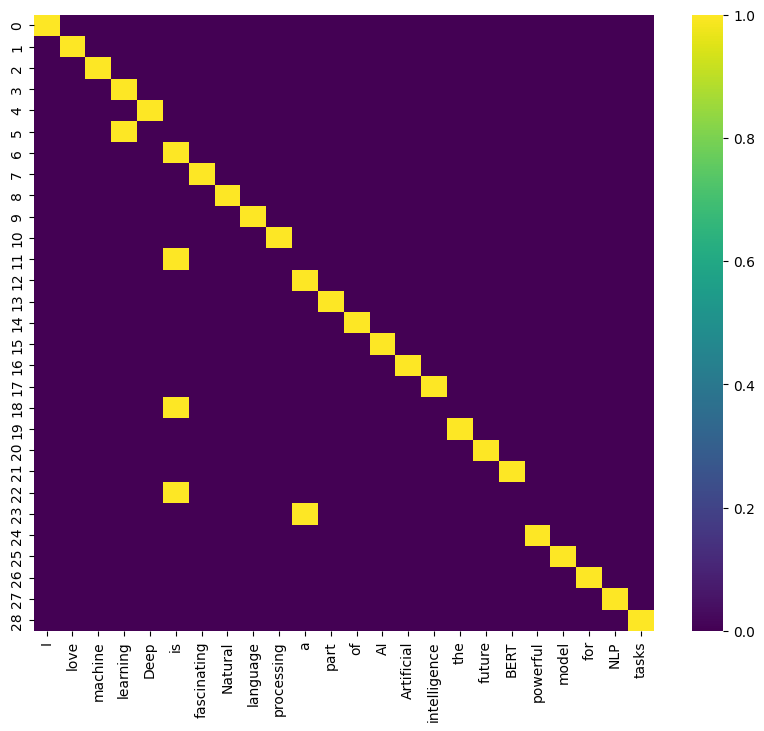

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to store the first occurrence index of `1` for each column
column_first_ones = {}

# Iterate through each column to find the index of the first occurrence of `1`
for col in one_hot_df.columns:
    if one_hot_df[col].sum() > 0:  # Check if the column has any `1`s
        column_first_ones[col] = one_hot_df[col].idxmax()

# Sort columns based on the index of the first occurrence of `1`
sorted_columns = sorted(column_first_ones, key=column_first_ones.get)

# Rearrange the DataFrame based on the sorted columns
sorted_df = one_hot_df[sorted_columns]

# Create a heatmap of the one-hot encoded DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_df, cmap='viridis')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Example sentences
sentences = [
    "I love machine learning",
    "Deep learning is fascinating",
    "Natural language processing is a part of AI",
    "Artificial intelligence is the future",
    "BERT is a powerful model for NLP tasks"
]

# Initialize the CountVectorizer with binary=True to perform one-hot encoding
vectorizer = CountVectorizer(binary=True)

# Fit and transform the sentences
one_hot_encoded = vectorizer.fit_transform(sentences)

# Convert the result to a DataFrame
df = pd.DataFrame(one_hot_encoded.toarray(), columns=vectorizer.get_feature_names_out())
df

,ai,artificial,bert,deep,fascinating,for,future,intelligence,is,language,...,machine,model,natural,nlp,of,part,powerful,processing,tasks,the
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,1,0,1,0,0
3,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0


## **2. Word2Vec Example**

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example sentences
sentences = [
    "I love machine learning",
    "Deep learning is fascinating",
    "Natural language processing is a part of AI",
    "Artificial intelligence is the future",
    "BERT is a powerful model for NLP tasks"
]

# Tokenize the sentences
tokenized_sentences = [sentence.split() for sentence in sentences]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=10, window=5, min_count=1, workers=4)


# Extract words and their embedding vectors
words = list(word2vec_model.wv.index_to_key)
embedding_vectors = [word2vec_model.wv[word] for word in words]

# Create a DataFrame
df = pd.DataFrame(embedding_vectors, index=words, columns=[f'{i}' for i in range(word2vec_model.vector_size)])
df

,0,1,2,3,4,5,6,7,8,9
is,-0.005350,0.002360,0.051025,0.090088,-0.093026,-0.071160,0.064599,0.089737,-0.050150,-0.037625
learning,0.073805,-0.015335,-0.045366,0.065541,-0.048602,-0.018160,0.028766,0.009919,-0.082852,-0.094488
a,0.073118,0.050703,0.067577,0.007629,0.063509,-0.034054,-0.009464,0.057686,-0.075216,-0.039361
tasks,-0.075100,-0.009319,0.095393,-0.073183,-0.023339,-0.019390,0.080763,-0.059299,0.000458,-0.047541
NLP,-0.096036,0.050073,-0.087596,-0.043918,-0.000351,-0.002962,-0.076612,0.096147,0.049821,0.092331
love,-0.081579,0.044958,-0.041371,0.008245,0.084986,-0.044622,0.045175,-0.067870,-0.035485,0.093985
machine,-0.015777,0.003214,-0.041406,-0.076827,-0.015080,0.024698,-0.008880,0.055337,-0.027430,0.022601
Deep,0.054558,0.083460,-0.014537,-0.092081,0.043706,0.005718,0.074419,-0.008133,-0.026384,-0.087530
fascinating,-0.008566,0.028266,0.054014,0.070527,-0.057031,0.018588,0.060889,-0.047981,-0.031073,0.067976
Natural,0.016315,0.001899,0.034736,0.002178,0.096188,0.050606,-0.089174,-0.070416,0.009015,0.063925


<Axes: >

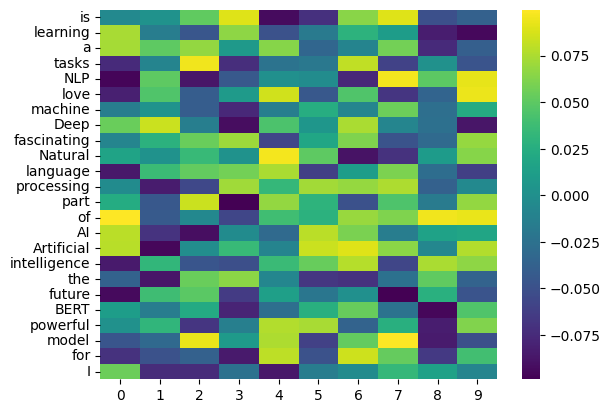

In [ ]:
sns.heatmap(df, cmap='viridis')

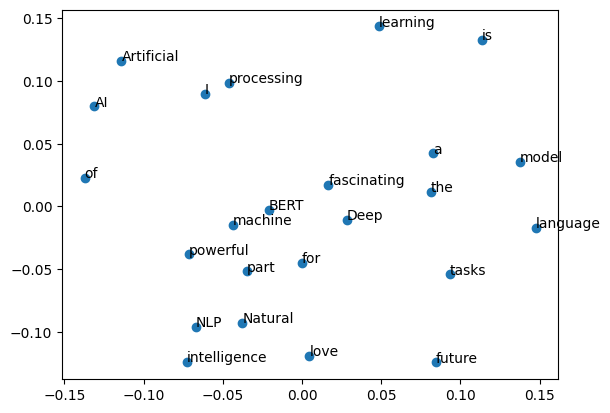

In [ ]:
# Visualize word vectors using PCA
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
word2vec_model.wv.most_similar('NLP')

[('machine', 0.614398181438446),
 ('powerful', 0.39088985323905945),
 ('intelligence', 0.3423161506652832),
 ('love', 0.24953821301460266),
 ('for', 0.24005822837352753),
 ('part', 0.1417798101902008),
 ('of', 0.11170648783445358),
 ('I', 0.0616038478910923),
 ('Natural', 0.04264766350388527),
 ('language', 0.02682802826166153)]

## **3. BERT Example**
- **BERT models, including bert-base-uncased, inherently produce embeddings of 768 dimensions for each token**

In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Example sentences
sentences = [
    "I love machine learning",
    "Deep learning is fascinating",
    "Natural language processing is a part of AI",
    "Artificial intelligence is the future",
    "BERT is a powerful model for NLP tasks"
]

# Tokenize sentences to get word-level embeddings
inputs = tokenizer(sentences, return_tensors='tf', padding=True, truncation=True, max_length=20)
outputs = bert_model(inputs)

# Extract the embeddings for all tokens (words)
word_embeddings = outputs.last_hidden_state

# Convert to numpy for easier manipulation
word_embeddings_np = word_embeddings.numpy()

# Get the tokens (words) from the tokenizer
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Print the embeddings and corresponding tokens
print("Word embeddings shape:", word_embeddings_np.shape)
print("Tokens:", tokens)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture

Word embeddings shape: (5, 11, 768)
Tokens: ['[CLS]', 'i', 'love', 'machine', 'learning', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import pandas as pd

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Example sentences
sentences = [
    "I love machine learning",
    "Deep learning is fascinating",
    "Natural language processing is a part of AI",
    "Artificial intelligence is the future",
    "BERT is a powerful model for NLP tasks"
]

# Tokenize sentences to get word-level embeddings
inputs = tokenizer(sentences,
                   return_tensors='tf',
                   padding=True, truncation=True, max_length=20)

outputs = bert_model(inputs)

# Extract the embeddings for all tokens (words)
word_embeddings = outputs.last_hidden_state

# Convert to numpy for easier manipulation
word_embeddings_np = word_embeddings.numpy()

# Prepare lists to hold tokens and their corresponding embeddings
all_tokens = []
all_embeddings = []

# Iterate over each sentence's tokens and embeddings
for i in range(len(sentences)):
    input_ids = inputs['input_ids'][i]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    embeddings = word_embeddings_np[i]

    # Collect tokens and embeddings, skipping special tokens
    for j, token in enumerate(tokens):
        if token not in ['[CLS]', '[SEP]', '[PAD]']:
            all_tokens.append(token)
            all_embeddings.append(embeddings[j])

# Create a DataFrame
df = pd.DataFrame(all_embeddings, columns=[f'vector_{i}' for i in range(word_embeddings_np.shape[-1])])
df['token'] = all_tokens
df.set_index('token', inplace=True)
df

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,...,vector_758,vector_759,vector_760,vector_761,vector_762,vector_763,vector_764,vector_765,vector_766,vector_767
token,,,,,,,,,,,,,,,,,,,,,
i,0.584785,0.263245,-0.124695,-0.145263,0.373239,-0.062608,-0.294973,1.080981,-0.047710,-0.359445,...,0.742363,-0.214542,0.960802,0.076512,0.456899,0.271010,0.056837,-0.110214,0.682417,0.307741
love,1.339127,1.063946,0.615598,0.057818,0.869914,-0.274898,-0.543115,0.849820,-0.539030,-0.710245,...,0.095517,-0.064143,-0.339998,0.065887,0.650338,0.409423,0.120066,0.050846,0.714804,0.223918
machine,0.366309,-0.168089,0.215126,-0.116997,1.380150,-0.082176,-0.112899,0.708500,-0.711475,-0.720669,...,0.670536,0.280851,-0.360657,-0.485737,0.487926,0.477600,-0.128397,-0.381429,-0.127755,0.385600
learning,-0.349985,-0.241019,-0.456643,0.358608,0.386345,-0.299834,-0.067467,0.746486,-0.546265,-0.141816,...,0.644767,0.386375,0.055049,-0.068075,-0.126313,-0.281095,0.297821,0.523316,0.267452,-0.298238
deep,-0.300554,-0.257729,0.173748,0.230786,0.315366,-0.163559,0.552483,0.526420,-0.207753,-0.536460,...,0.959645,0.037432,0.223516,-0.377158,-0.054168,0.816056,0.138259,0.092748,0.457918,0.205706
learning,0.020925,0.391822,0.297728,0.193579,0.339285,-0.081092,0.167213,0.620544,-0.212685,-0.248963,...,0.014746,-0.012025,-0.302780,-0.179061,-0.145012,0.382908,0.513716,0.025172,0.077856,-0.609007
is,-0.109446,-0.121695,0.341942,0.157605,0.305040,-0.391897,0.350514,1.131509,-0.243114,-0.963161,...,0.181189,-0.575993,0.284743,-0.445284,0.006168,0.094438,0.997881,0.083305,-0.336028,0.477332
fascinating,-0.143099,-0.261810,-0.310661,0.373755,0.376348,-0.914254,-0.042274,0.230109,-0.357108,-0.401639,...,0.098896,-0.240717,-0.228531,-0.649708,-0.131101,-0.234350,0.475104,0.531168,0.221356,0.108670
natural,-0.177141,-0.029724,-0.405366,-0.353772,0.035831,-0.053231,-0.168639,0.577139,0.221258,-0.313452,...,0.180311,0.079876,0.860019,0.234420,0.065704,0.433733,0.513364,-0.075616,0.126518,0.382193


In [ ]:
# Convert to numpy array
import numpy as np

all_embeddings_np = np.array(all_embeddings)

# Apply PCA to reduce to 10 dimensions
pca = PCA(n_components=10)
reduced_embeddings = pca.fit_transform(all_embeddings_np)

# Create a DataFrame
df = pd.DataFrame(reduced_embeddings, columns=[f'vector_{i}' for i in range(10)])
df['token'] = all_tokens
df

,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,token
0,7.382661,2.283587,-4.372783,-3.740030,-3.169025,0.483497,1.265291,-2.756117,-0.404650,-1.369626,i
1,0.629903,6.353407,1.105535,-2.078660,-2.004676,4.018340,4.039448,0.238815,1.194246,-1.848632,love
2,1.504758,0.243828,0.019402,2.339618,1.590308,4.285433,0.304492,7.700786,5.307352,-2.237715,machine
3,4.104797,3.546011,7.101981,3.084694,-3.346240,-1.052423,-0.572729,0.030271,1.540522,0.130596,learning
4,4.657504,2.654818,-0.703580,-1.935226,-2.055470,3.642151,-0.192733,0.609637,-0.775576,0.508680,deep
5,2.378060,2.411142,3.263274,-0.309994,-0.376626,3.895433,-0.560810,1.595523,-3.354267,1.694423,learning
6,-2.290567,4.996930,1.198363,-1.601607,-0.555508,3.831835,-3.564361,-2.283362,-1.306259,-1.731622,is
7,2.667158,4.390034,7.060894,0.170602,-3.263018,0.581429,-0.281590,-2.515872,-0.278927,1.313487,fascinating
8,8.074627,-4.570298,-6.924163,1.650307,-0.830103,-0.168199,0.349744,-1.924427,3.118347,-1.442797,natural
9,-0.169733,-2.377127,-2.077312,8.519229,5.074162,5.689660,1.150095,-4.235614,-0.026441,3.180628,language


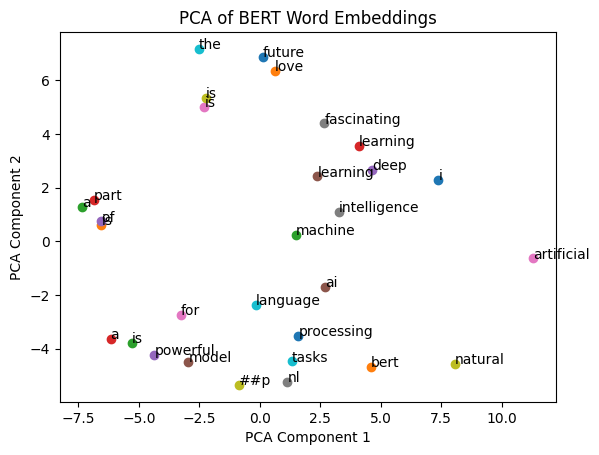

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Flatten the embeddings for PCA (excluding padding tokens)
flat_embeddings = []
flat_tokens = []

for i, sentence in enumerate(sentences):
    for j, token in enumerate(tokenizer.convert_ids_to_tokens(inputs['input_ids'][i])):
        if token not in ['[CLS]', '[SEP]', '[PAD]']:  # Exclude special tokens
            flat_embeddings.append(word_embeddings_np[i, j, :])
            flat_tokens.append(token)

flat_embeddings = np.array(flat_embeddings)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(flat_embeddings)

# Plot the 2D embeddings
for i, token in enumerate(flat_tokens):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("PCA of BERT Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## **[tensorflow projector](https://projector.tensorflow.org/)**